In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr

In [2]:
cat_info = pd.read_excel("./data/DACC_Hackathon_Categories_Information.xlsx")

# find calories per volume
# a volume is in kg/litres
# except for Instant Noodles and Eggs
# we assume each volumem of egg is 1 egg or 50g, so Calories/Volume is (calories per 100g)/2 = 97/2 = 48.5 calories
# we assume each volume of instant noodles is 100g, so Calories/Volume is the same as Calories/100g = 431 calories

CaloriesPerVol = pd.DataFrame(cat_info['Calories/100g'] * 10)
cat_info.insert(3, "Calories/Volume", CaloriesPerVol)
#pd.set_option("display.max_rows", 5)
cat_info.at[25, 'Calories/Volume'] = 48.5 #eggs
cat_info.at[33, 'Calories/Volume'] = 431 #instant noodles
cat_info['Category'].unique()

array(['Beer', 'Belacan', 'Bird Nest', 'Biscuits', 'Bouilon', 'Butter',
       'Cake', 'Canned Product', 'Cereal Beverage', 'Cereals', 'Cheese',
       'Chicken Essence', 'Choc/Nut Spread', 'Chocolate', 'Coconut Milk',
       'Coffee', 'Condensed/Evap Milk', 'Confectionery', 'Cooking Oils',
       'Cooking Sauces', 'Cordials', 'Creamer', 'CSD', 'Cultured Milk',
       'Drinking Water', 'Eggs', 'Energy Drinks', 'Flour', 'Frozen Food',
       'Fruit/Veg Juices', 'Ghee', 'Honey', 'Ice Cream',
       'Instant Noodles', 'Instant Soup', 'Isotonic Drinks', 'Jam',
       'Kaya', 'Liquid Milk', 'Margarine', 'Milk Powder-Adult',
       'Milk Powder-Infant', 'Milk Powder-Kids', 'MSG', 'Peanut Butter',
       'Rice', 'RTD Coffee', 'RTD Tea', 'Salad Dressing',
       'Savoury Spread', 'Seasoning Powder', 'Snack', 'Soy Milk',
       'Spagetti', 'Spirits', 'Sugar', 'Tea', 'Tonic Food Drink', 'Wine',
       'Yoghurt Drink', 'Yoghurts'], dtype=object)

In [3]:
cat_cal_per_vol = cat_info[['Category', 'Calories/Volume']]
cat_cal_per_vol['Category'] = cat_cal_per_vol['Category'].str.upper()
#cat_cal_per_vol


<ipython-input-3-a39815b39e5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cal_per_vol['Category'] = cat_cal_per_vol['Category'].str.upper()


In [4]:
transac = pd.read_csv("./data/DACC_Hackathon_TransactionData.csv")
transac['Panel ID'] = transac['Panel ID'].astype(int)
#transac

In [5]:
panel_demog = pd.read_excel("./data/DACC_Hackathon_Panelists_Demogs.xlsx") 
panel_demog['ID'] = panel_demog['ID'].str[6:].astype(int)
#panel_demog.head(20)

# Items that low income family buys the most

In [6]:
lowincome_panel = list(panel_demog[panel_demog['Income'] == '<RM2000 (Low)' ]['ID'])

In [7]:
#lowincome transaction
low = transac[transac['Panel ID'].isin(lowincome_panel)]

In [8]:
low_spend = low.groupby('Category').count().sort_values(by = 'Panel ID', ascending = False)
#we can tell biscuits, eggs, sugar, cooking sauce and condensed milk,rice are most bought items for low income family
low_spend = low_spend.add_suffix('_Count').reset_index()
low_spend = low_spend.head(20)

In [9]:
x = low_spend['Category']

In [10]:
y = low_spend['Panel ID_Count']

Text(0, 0.5, 'Frequency')

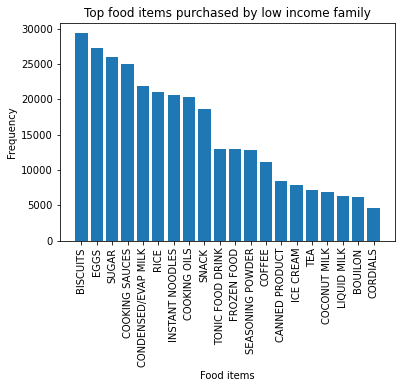

In [11]:
import matplotlib.pyplot as plt
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.title('Top food items purchased by low income family')
plt.xlabel('Food items')
plt.ylabel('Frequency')

In [12]:
low.groupby(['Panel ID', 'Category']).mean()

Pack Size     Volume      Spend
Panel ID  Category                                         
101011101 BISCUITS           1.160000   0.352000   5.356000
          BOUILON            1.000000   0.100000   2.887500
          BUTTER             2.500000   0.650000  11.350000
          CAKE               1.000000   0.333333   5.233333
          CANNED PRODUCT     1.357143   0.314286   5.128571
...                               ...        ...        ...
802304101 RICE               1.000000  10.000000  26.650000
          SNACK              1.000000   0.150000   3.200000
          SUGAR              2.500000   2.500000   6.850000
          TEA                1.000000   0.000000   2.500000
          TONIC FOOD DRINK   1.000000   1.000000  16.000000

[25664 rows x 3 columns]

In [13]:
#each panel ID rice


In [14]:
#how much each panel ID spent on rice
low[low['Category'] == 'RICE'].groupby(['Panel ID']).sum()

,Pack Size,Volume,Spend
Panel ID,,,
101011101,57.0,373.0,1052.9
101016101,23.0,165.0,410.4
101019101,97.0,740.0,1821.0
101024101,27.0,230.0,628.9
105009103,17.0,150.0,377.5
...,...,...,...
802289501,1.0,10.0,25.8
802293801,6.0,30.0,81.0
802296501,3.0,25.0,66.0


In [16]:
#read in previously made csv that finds each panel's first and last transaction
dates = pd.read_csv('dates_min_max.csv')
dates

FileNotFoundError: [Errno 2] No such file or directory: 'dates_min_max.csv'

In [ ]:
#convert to datetime
dates = dates.iloc[1: , :]
dates['Date.1'] = pd.to_datetime(dates['Date.1'])
dates['Date.2'] = pd.to_datetime(dates['Date.2'])
dates

In [ ]:
#to find the number of months between the first and the last transaction
def diff_month(d1,d2):
    return (d2.year - d1.year) *12 + d2.month - d1.month

In [ ]:
month = []
for indedx, rows in dates.iterrows():
    month.append(diff_month(rows['Date.1'], rows['Date.2']))
month
dates['month'] = month
dates['Panel ID'] = dates['Panel ID'].apply(round)
#dates

In [ ]:
#how much each panel ID spent on rice
rice = low[low['Category'] == 'RICE'].groupby(['Panel ID']).sum()
rice

In [ ]:
item = 'BISCUITS'
item_table = low[low['Category'] == items].groupby(['Panel ID']).sum()
panel_month_spend = pd.DataFrame.merge(dates, item_table, left_on='Panel ID', right_on='Panel ID')
panel_month_spend['monthly_spent'] = panel_month_spend['Spend']/ panel_month_spend['month']
new_rice = panel_month_spend[['Panel ID','month','Spend','monthly_spent']]
new_rice.replace([np.inf, -np.inf], np.nan, inplace=True)
new_rice.dropna()
new_rice.boxplot(column = 'monthly_spent')
plt.title(item)

In [ ]:
#For each of the top 5 items bought by low income family, how much do low income family spent on these food 
#Done by taking the total amount spent dividing by the number of months since the first and last transaction

unique = ['BISCUITS', 'EGGS','SUGAR','COOKING SAUCES','RICE']
for items in unique:
    item_table = low[low['Category'] == items].groupby(['Panel ID']).sum()
    panel_month_spend = pd.DataFrame.merge(dates, item_table, left_on='Panel ID', right_on='Panel ID')
    panel_month_spend['monthly_spent'] = panel_month_spend['Spend']/ panel_month_spend['month']
    new_rice = panel_month_spend[['Panel ID','month','Spend','monthly_spent']]
    new_rice.replace([np.inf, -np.inf], np.nan, inplace=True)
    print(items + "+ ")
    print(new_rice.describe())